In [3]:
import pandas as pd
import pickle
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical

Using TensorFlow backend.


In [4]:
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.models import Sequential
from keras.optimizers import Adam

from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras import backend as K, initializers, regularizers, constraints
from keras.engine.topology import Layer
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [5]:
from keras.layers import Lambda,Reshape,concatenate,Input, Embedding, LSTM,GRU
from keras.layers import Dense,Dropout, Activation ,Flatten ,RepeatVector, Bidirectional,GlobalAveragePooling1D
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam,SGD
from keras.activations import softmax
from keras import regularizers

from keras import backend as K, regularizers, constraints, initializers
from keras.engine.topology import Layer

from keras.layers import merge
from keras.layers.convolutional import Conv1D,Conv2D
from keras.layers.convolutional import MaxPooling1D,MaxPooling2D
from keras.models import Sequential

from keras.callbacks import EarlyStopping

from keras.layers import Concatenate,Dot
from keras.layers import Permute, merge

In [6]:
import numpy as np
import seaborn as sns

In [9]:
data1 = pickle.load(open("ASAP_withoutCosineSim_DATA.dat","rb"))

In [7]:
data = pickle.load(open("ASAP_TRAIN_ESSAY1_DATA.dat","rb"))

In [10]:
data1.head()

,Id,EssaySet,Score1,Score2,EssayText,clean,X,X_1,error_words,total_errors,CosineSim_2
0,1,1,1,1,Some additional information that we would need...,some additional information that we would need...,"[163, 299, 67, 8, 188, 15, 49, 2, 147, 1, 54, ...","[163, 299, 67, 8, 188, 15, 49, 2, 147, 1, 54, ...",[],0,0.868468
1,2,1,1,1,"After reading the expirement, I realized that ...","after reading the expirement , i realized that...","[114, 225, 1, 1107, 34, 684, 8, 1, 299, 67, 32...","[114, 225, 1, 1107, 34, 684, 8, 1, 299, 67, 32...","[expirement, expireiment, amant, yar, expireme...",6,0.836522
2,3,1,1,1,"What you need is more trials, a control set up...","what you need is more trials , a control set u...","[23, 32, 49, 4, 55, 199, 6, 237, 875, 127, 3, ...","[23, 32, 49, 4, 55, 199, 6, 237, 875, 127, 3, ...",[],0,0.835054
3,4,1,0,0,The student should list what rock is better an...,the student should list what rock is better an...,"[1, 152, 82, 960, 23, 1366, 4, 208, 3, 23, 136...","[1, 152, 82, 960, 23, 1366, 4, 208, 3, 23, 136...",[],0,0.710318
4,5,1,2,2,For the students to be able to make a replicat...,for the students to be able to make a replicat...,"[20, 1, 178, 2, 14, 290, 2, 97, 6, 147, 10, 15...","[20, 1, 178, 2, 14, 290, 2, 97, 6, 147, 10, 15...","[tipe, expirement]",2,0.878116


In [8]:
data.head()

,Id,EssaySet,Score1,Score2,EssayText,clean,X,X_1,error_words,total_errors
0,1,1,1,1,Some additional information that we would need...,some additional information that we would need...,"[163, 299, 67, 8, 188, 15, 49, 2, 147, 1, 54, ...","[163, 299, 67, 8, 188, 15, 49, 2, 147, 1, 54, ...",[],0
1,2,1,1,1,"After reading the expirement, I realized that ...","after reading the expirement , i realized that...","[114, 225, 1, 1107, 34, 684, 8, 1, 299, 67, 32...","[114, 225, 1, 1107, 34, 684, 8, 1, 299, 67, 32...","[expirement, expireiment, amant, yar, expireme...",6
2,3,1,1,1,"What you need is more trials, a control set up...","what you need is more trials , a control set u...","[23, 32, 49, 4, 55, 199, 6, 237, 875, 127, 3, ...","[23, 32, 49, 4, 55, 199, 6, 237, 875, 127, 3, ...",[],0
3,4,1,0,0,The student should list what rock is better an...,the student should list what rock is better an...,"[1, 152, 82, 960, 23, 1366, 4, 208, 3, 23, 136...","[1, 152, 82, 960, 23, 1366, 4, 208, 3, 23, 136...",[],0
4,5,1,2,2,For the students to be able to make a replicat...,for the students to be able to make a replicat...,"[20, 1, 178, 2, 14, 290, 2, 97, 6, 147, 10, 15...","[20, 1, 178, 2, 14, 290, 2, 97, 6, 147, 10, 15...","[tipe, expirement]",2


In [11]:
data['CosineSim_2'] = data1['CosineSim_2']
# data= data.drop(columns='CosineSim')
data.head()

,Id,EssaySet,Score1,Score2,EssayText,clean,X,X_1,error_words,total_errors,CosineSim_2
0,1,1,1,1,Some additional information that we would need...,some additional information that we would need...,"[163, 299, 67, 8, 188, 15, 49, 2, 147, 1, 54, ...","[163, 299, 67, 8, 188, 15, 49, 2, 147, 1, 54, ...",[],0,0.868468
1,2,1,1,1,"After reading the expirement, I realized that ...","after reading the expirement , i realized that...","[114, 225, 1, 1107, 34, 684, 8, 1, 299, 67, 32...","[114, 225, 1, 1107, 34, 684, 8, 1, 299, 67, 32...","[expirement, expireiment, amant, yar, expireme...",6,0.836522
2,3,1,1,1,"What you need is more trials, a control set up...","what you need is more trials , a control set u...","[23, 32, 49, 4, 55, 199, 6, 237, 875, 127, 3, ...","[23, 32, 49, 4, 55, 199, 6, 237, 875, 127, 3, ...",[],0,0.835054
3,4,1,0,0,The student should list what rock is better an...,the student should list what rock is better an...,"[1, 152, 82, 960, 23, 1366, 4, 208, 3, 23, 136...","[1, 152, 82, 960, 23, 1366, 4, 208, 3, 23, 136...",[],0,0.710318
4,5,1,2,2,For the students to be able to make a replicat...,for the students to be able to make a replicat...,"[20, 1, 178, 2, 14, 290, 2, 97, 6, 147, 10, 15...","[20, 1, 178, 2, 14, 290, 2, 97, 6, 147, 10, 15...","[tipe, expirement]",2,0.878116


In [12]:
ref_ans='You need to know how much vinegar was used in each container. You need to know what type of vinegar was used in each container. You need to know what materials to test. You need to know what size/surface area of materials should be used. You need to know how long each sample was rinsed in distilled water.You need to know what drying method to use. You need to know what size/type of container to use. Other acceptable responses.'
ref_ans

'You need to know how much vinegar was used in each container. You need to know what type of vinegar was used in each container. You need to know what materials to test. You need to know what size/surface area of materials should be used. You need to know how long each sample was rinsed in distilled water.You need to know what drying method to use. You need to know what size/type of container to use. Other acceptable responses.'

In [13]:
data['reference_ans'] = ref_ans

# Length Ratio Feature 

In [14]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import pos_tag
from string import punctuation,digits

In [15]:

def remove_punctuation(s):
    list_punctuation = list(punctuation)
    for i in list_punctuation:
        s = s.replace(i,' ')
    return s

In [16]:
def clean_sentence(sentence):
    sentence = sentence.lower()
    tokens = sentence.split()
    tokens = [remove_punctuation(w) for w in tokens]
    
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = ' '.join(tokens)
    return tokens

ref_sent = clean_sentence(Ref_ans1)
ref_length = len(ref_sent.split())

sentence = [clean_sentence(x) for x in data['clean']]

lengths = [len(s.split()) for s in sentence]

NameError: name 'Ref_ans1' is not defined

In [ ]:
def length_ratio(sentence1, sentence2):
    return (sentence1) / (sentence2/2)



In [25]:
print(length_ratio(lengths[0],lengths[8]))

1.7419354838709677


In [26]:
length_ratio = [length_ratio(i,ref_length) for i in lengths]

In [44]:
data['length_ratio'] = length_ratio
#data['length_ratio']

NameError: name 'length_ratio' is not defined

# Tokenizing

In [14]:
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines) 
    return tokenizer

# encode a list of lines
def encode_text(tokenizer, lines, length):
    encoded = tokenizer.texts_to_sequences(lines)
    padded = pad_sequences(encoded, maxlen=length, padding='post')
    return padded

max len =  133


/home/aruhi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


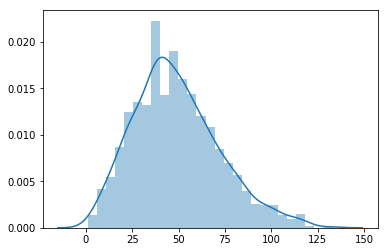

In [15]:
lengths = [len(s.split()) for s in data['clean']]

print('max len = ',max(lengths))
sns.distplot(lengths)
max_length  = max(lengths)

In [16]:
total =[]
for i in data['clean']:
    total.append(i)
total.append(ref_ans)

In [17]:
total = " ".join(total)

In [103]:
tokenizer = create_tokenizer(data['reference_ans']+data['clean'])
vocab_size = len(tokenizer.word_index) + 1
X_token = encode_text(tokenizer, data['clean'],max_length)


In [104]:
X_ref = encode_text(tokenizer,data['reference_ans'],max_length)

In [105]:
length = [len(i) for i in data['reference_ans']]
print(max(length))

430


In [106]:
X_ref[0]

array([ 3,  2,  1,  4, 13, 20, 14, 12, 11,  7,  9, 10,  3,  2,  1,  4,  5,
       18,  6, 14, 12, 11,  7,  9, 10,  3,  2,  1,  4,  5, 16,  1, 30,  3,
        2,  1,  4,  5, 17, 31, 29,  6, 16, 21, 19, 11,  3,  2,  1,  4, 13,
       26,  9, 22, 12, 28,  7, 25, 24,  3,  2,  1,  4,  5, 32, 33,  1, 15,
        3,  2,  1,  4,  5, 17, 18,  6, 10,  1, 15, 27, 34, 35,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

# Embedding

In [36]:
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r',errors='ignore')
    model = {}
    for line in f:
        splitLine = line.split()
        try: 
            word = splitLine[0]
            embedding = np.array([float(val) for val in splitLine[1:]])
            model[word] = embedding
        except :
            pass
    print ("Done.",len(model)," words loaded!")
    return model

model = loadGloveModel(r"/home/aruhi/Word Embeddings/glove.twitter.27B/glove.twitter.27B.200d.txt")

Loading Glove Model
Done. 1193514  words loaded!


In [53]:
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r',errors='ignore')
    model = {}
    for line in f:
        splitLine = line.split()
        try: 
            word = splitLine[0]
            embedding = np.array([float(val) for val in splitLine[1:]])
            model[word] = embedding
        except :
            pass
    print ("Done.",len(model)," words loaded!")
    return model

model = loadGloveModel(r"/home/aruhi/Word Embeddings/glove.twitter.27B/glove.twitter.27B.100d.txt")

Loading Glove Model
Done. 1193514  words loaded!


In [54]:
pickle.dump(model,open("GLOVE_100.DAT","wb"))

In [37]:
pickle.dump(model,open("GLOVE_200.DAT","wb"))

In [83]:
model = pickle.load(open("GLOVE_200.DAT","rb"))

In [55]:
model = pickle.load(open("GLOVE_100.DAT","rb"))

In [84]:
from gensim.models import KeyedVectors

def get_glove_embedding_matrix(model):
    embedding_matrix = np.zeros((vocab_size,200))
    w2v={}
    for word, i in tokenizer.word_index.items():
        try:
            embedding_vector = model[word]
        except KeyError:
            embedding_vector = None
        if embedding_vector is not None:
            embedding_matrix[i]=embedding_vector
            w2v[word]=i
    return embedding_matrix,w2v


embedding_matrix_glove,word_2_index_glove = get_glove_embedding_matrix(model)

# trying glove

In [36]:
from gensim.models import KeyedVectors


def get_word2vec_embedding_matrix(model):
    embedding_matrix = np.zeros((vocab_size,300))
    w2v={}
    for word, i in tokenizer.word_index.items():
        try:
            embedding_vector = model[word]
        except KeyError:
            embedding_vector = None
        if embedding_vector is not None:
            embedding_matrix[i]=embedding_vector
            w2v[word]=i
    return embedding_matrix,w2v

word2vec_model= pickle.load(open('D:\GoogleNews-vectors-negative300.dat','rb'))

embedding_matrix_word2vec,word_2_index = get_word2vec_embedding_matrix(word2vec_model)

In [13]:
#pickle.dump(embedding_matrix_word2vec,open("Google_News_Essays.dat","wb"))
#pickle.dump(glove_embedding,open("Glove_Essays.dat","wb"))

In [29]:
embedding_matrix_word2vec = pickle.load(open("Google_News_Essays.dat","rb"))
glove_embedding=pickle.load(open("Glove_Essays.dat","rb"))

# Attention

In [24]:
def dot_product(x, kernel):
    """
    Wrapper for dot product operation, in order to be compatible with both
    Theano and Tensorflow
    Args:
        x (): input
        kernel (): weights
    Returns:
    """
    if K.backend() == 'tensorflow':
        # todo: check that this is correct
        return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
    else:
        return K.dot(x, kernel)


class Attention(Layer):
    def __init__(self,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True,
                 return_attention=False,
                 **kwargs):
        """
        Keras Layer that implements an Attention mechanism for temporal data.
        Supports Masking.
        Follows the work of Raffel et al. [https://arxiv.org/abs/1512.08756]
        # Input shape
            3D tensor with shape: `(samples, steps, features)`.
        # Output shape
            2D tensor with shape: `(samples, features)`.
        :param kwargs:
        Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
        The dimensions are inferred based on the output shape of the RNN.
        Note: The layer has been tested with Keras 1.x
        Example:
        
            # 1
            model.add(LSTM(64, return_sequences=True))
            model.add(Attention())
            # next add a Dense layer (for classification/regression) or whatever...
            # 2 - Get the attention scores
            hidden = LSTM(64, return_sequences=True)(words)
            sentence, word_scores = Attention(return_attention=True)(hidden)
        """
        self.supports_masking = True
        self.return_attention = return_attention
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
#        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        eij = dot_product(x, self.W)

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        weighted_input = x * K.expand_dims(a)

        result = K.sum(weighted_input, axis=1)
        
        print(result.shape)

        if self.return_attention:
            return [result, a]
        return result

    def compute_output_shape(self, input_shape):
        if self.return_attention:
            return [(input_shape[0], input_shape[-1]),
                    (input_shape[0], input_shape[1])]
        else:
            return input_shape[0], input_shape[-1]

# Model to get the intermediate layer 

In [25]:
callbacks = [
     EarlyStopping(monitor='val_acc' , patience = 5 , verbose=1)
    #ModelCheckpoint(kfold_weights_path, monitor='val_loss', save_best_only=True, verbose=0),
]

In [26]:
from sklearn.model_selection import train_test_split
count=0;
test_count=0;
cvscores = []
final_Core= [] 
ID=[]
NUMBER=[]

#for i in np.unique(data['EssaySet']):
    
#train
essay_list, resolved_scores = X_token , data['Score1']

dataX = essay_list
dataY = resolved_scores
no_of_classes = len(set(resolved_scores))

trainX = [np.asarray(i) for i in essay_list]
trainX = np.asarray(trainX)
trainY = dataY
trainY = np.asarray(trainY)

print ((trainX.shape),(trainY.shape))



    #print (train_index , test_index)
X_train, X_test, y_train, y_test = train_test_split(trainX,trainY,test_size = 0.2)
print (X_train.shape, y_train.shape)
y_train = to_categorical(y_train , 4)
y_test = to_categorical(y_test , 4)

(1672, 133) (1672,)
(1337, 133) (1337,)


In [27]:
print(X_train.shape),print(X_test.shape)

(1337, 133)
(335, 133)


(None, None)

In [28]:
print(y_train.shape),print(y_test.shape)

(1337, 4)
(335, 4)


(None, None)

# CNN

In [144]:
def define_model2(dropout,learning_rate,em,em_dim,lstm_out, n_hidden_layer,em_trainable_flag,input_shape_1,n_filters=100):
    print(input_shape_1)
    input_context= Input(shape=(max_length,),name='Sentence')
    input_features = Input(shape=(input_shape_1,),name='Features')
    
    hidden = Dense(250,activation='relu')(input_features)
    hidden = Dense(200,activation='relu') (hidden)

    embedding1=Embedding(vocab_size, em_dim, weights = [eval(em)],input_length=max_length,trainable = False)
    
    context1= embedding1(input_context)
    
    concat1=Dropout(0.3)(context1)

    c3=Conv1D(n_filters,kernel_size=3,activation='relu')(concat1)
    drop3 = Dropout(0.2)(c3)
    pool3 = MaxPooling1D(pool_size=2)(drop3)
    flat = Flatten()(pool3)

    C= concatenate([flat, hidden])    
    a=Dense(327,activation='relu')(C)
        
    out=Dense(4,activation='softmax')(a)
    
    model= Model(inputs=[input_context,input_features] ,outputs=out)
    

    optimizer = Adam(lr=learning_rate)

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    
    #print(model.summary())
    
    return model

In [147]:
model=define_model2(learning_rate=0.001,
                     dropout=0.5,
                     lstm_out=300,
                     n_hidden_layer=1,
                     em='embedding_matrix_glove',
                     em_trainable_flag=False,
                     em_dim=200,
                    input_shape_1=X_features_train.shape[1])

13218


In [148]:
EarlyStop= EarlyStopping(monitor='val_loss',patience=5,verbose=1)


model.fit(x=[X_train,X_features_train],y=y_train, epochs=100,batch_size=32,\
          callbacks=[EarlyStop],validation_data=([X_test,X_features_test],y_test))

Train on 1337 samples, validate on 335 samples
Epoch 1/100
1337/1337 [==============================] - 10s 8ms/step - loss: 1.5761 - acc: 0.3351 - val_loss: 1.3160 - val_acc: 0.3612
Epoch 2/100
1337/1337 [==============================] - 7s 5ms/step - loss: 1.1952 - acc: 0.4607 - val_loss: 1.2847 - val_acc: 0.4030
Epoch 3/100
1337/1337 [==============================] - 7s 5ms/step - loss: 0.8099 - acc: 0.6784 - val_loss: 1.3369 - val_acc: 0.4119
Epoch 4/100
1337/1337 [==============================] - 6s 4ms/step - loss: 0.3073 - acc: 0.9080 - val_loss: 1.8086 - val_acc: 0.4358
Epoch 5/100
1337/1337 [==============================] - 7s 5ms/step - loss: 0.0747 - acc: 0.9843 - val_loss: 2.3318 - val_acc: 0.3821
Epoch 6/100
1337/1337 [==============================] - 6s 5ms/step - loss: 0.0230 - acc: 0.9963 - val_loss: 2.4969 - val_acc: 0.3791
Epoch 7/100
1337/1337 [==============================] - 6s 5ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 2.7786 - val_acc: 0.3552
Epoch 0

In [149]:
pred = model.predict([X_test,X_features_test])
out= get_class_from_pred(pred)
actual= get_class_from_pred(y_test)
print(m.quadratic_weighted_kappa(actual,out))

0.4699411230752575


In [318]:
pred= model.predict([X_test,X_features_test])
pred= get_class_from_pred(pred)
print("Macro: ",f1_score(valid_y,pred,average='macro'))
print("Weighted: ",f1_score(valid_y,pred,average='weighted'))
print("Accuracy: " ,accuracy_score(valid_y,pred))

Macro:  0.2583111147581683
Weighted:  0.27000975869456756
Accuracy:  0.28955223880597014


In [284]:
intermediate_X_train.shape[1]

300

# Model with Features instead of Intermediate 

In [319]:
def define_model(learning_rate,dropout,lstm_out,n_hidden_layer,em,em_trainable_flag,input_shape_1):
    input_sentence= Input(shape=(max_length,),name='Sentence')    
    input_features = Input(shape=(input_shape_1,),name='Intermediate')
    
    embedding=Embedding(vocab_size, len(eval(em)[0]), weights = [eval(em)],input_length=max_length,trainable = em_trainable_flag)(input_sentence)
    
    context=Dropout(0.5)(embedding)
        
    a = Bidirectional(LSTM(300, return_sequences=True,recurrent_dropout=dropout))(context)
    
    
    a = Attention()(a)
    
    hidden = Dense(300,activation='relu')(input_features)
    hidden = Dense(150,activation='relu') (hidden)
    
    
    C= concatenate([a, hidden])
    
    x=Dense(300,activation='relu')(C)
        
    output=Dense(4,activation='softmax')(x)

    model= Model(inputs=[input_sentence,input_features] ,outputs=output)
    
    optimizer = Adam(lr=learning_rate)
    
    model.compile(loss = 'categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    

    
    return model



In [320]:
model = define_model(learning_rate=0.001,
                     dropout=0.5,
                     lstm_out=300,
                     n_hidden_layer=1,
                     em='embedding_matrix_word2vec',
                     em_trainable_flag=False,
                    input_shape_1=X_features_train.shape[1])

(?, 600)


In [321]:
EarlyStop= EarlyStopping(monitor='val_loss',patience=5,verbose=1)


model.fit(x=[X_train,X_features_train],y=y_train, epochs=100,batch_size=32,
              callbacks=[EarlyStop],validation_data=([X_test,X_features_test],y_test))

Train on 1337 samples, validate on 335 samples
Epoch 1/100
1337/1337 [==============================] - 432s 323ms/step - loss: 1.2861 - acc: 0.3807 - val_loss: 1.1670 - val_acc: 0.4269
Epoch 2/100
1337/1337 [==============================] - 464s 347ms/step - loss: 0.9717 - acc: 0.5931 - val_loss: 1.1079 - val_acc: 0.5015
Epoch 3/100
1337/1337 [==============================] - 427s 320ms/step - loss: 0.5968 - acc: 0.7651 - val_loss: 1.3508 - val_acc: 0.5134
Epoch 4/100
1337/1337 [==============================] - 422s 315ms/step - loss: 0.2074 - acc: 0.9289 - val_loss: 1.7841 - val_acc: 0.4716
Epoch 5/100
1337/1337 [==============================] - 421s 315ms/step - loss: 0.0791 - acc: 0.9738 - val_loss: 2.3197 - val_acc: 0.4478
Epoch 6/100
1337/1337 [==============================] - 417s 312ms/step - loss: 0.0221 - acc: 0.9963 - val_loss: 2.5754 - val_acc: 0.4716
Epoch 7/100
1337/1337 [==============================] - 1187s 888ms/step - loss: 0.0069 - acc: 0.9985 - val_loss: 2.70

In [322]:
pred= model.predict([X_test,X_features_test])
pred= get_class_from_pred(pred)
print("Accuracy: " ,accuracy_score(valid_y,pred))
print("Macro: ",f1_score(valid_y,pred,average='macro'))
print("Weighted: ",f1_score(valid_y,pred,average='weighted'))

Accuracy:  0.30149253731343284
Macro:  0.28424722680140635
Weighted:  0.2908761690588778


# Model with  Intermediate 

In [136]:
def define_model(learning_rate,dropout,lstm_out,n_hidden_layer,em,em_trainable_flag,input_shape_1):
    input_sentence= Input(shape=(max_length,),name='Sentence')    
    input_features = Input(shape=(input_shape_1,),name='Features')
    
    embedding=Embedding(vocab_size, len(eval(em)[0]), weights = [eval(em)],input_length=max_length,trainable = em_trainable_flag)(input_sentence)
    
    context=Dropout(0.5)(embedding)
        
    a = Bidirectional(LSTM(300, return_sequences=True,recurrent_dropout=dropout))(context)
    
    
    a = Attention()(a)
    
    hidden = Dense(350,activation='relu')(input_features)
    hidden = Dense(300,activation='relu') (hidden)
    
    
    C= concatenate([a, hidden])
    

    x=Dense(300,activation='relu')(C)
        
    output=Dense(4,activation='softmax')(x)

    model= Model(inputs=[input_sentence,input_features] ,outputs=output)
    
    optimizer = Adam(lr=learning_rate)
    
    model.compile(loss = 'categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    

    
    return model



In [138]:
model = define_model(learning_rate=0.001,
                     dropout=0.5,
                     lstm_out=300,
                     n_hidden_layer=1,
                     em='embedding_matrix_glove',
                     em_trainable_flag=False,
                    input_shape_1=X_features_train.shape[1])

(?, 600)


In [139]:
EarlyStop= EarlyStopping(monitor='val_loss',patience=5,verbose=1)


model.fit(x=[X_train,X_features_train],y=y_train, epochs=100,batch_size=32,
              callbacks=[EarlyStop],validation_data=([X_test,X_features_test],y_test))

Train on 1337 samples, validate on 335 samples
Epoch 1/100
1337/1337 [==============================] - 76s 56ms/step - loss: 1.3401 - acc: 0.3328 - val_loss: 1.3260 - val_acc: 0.3284
Epoch 2/100
1337/1337 [==============================] - 68s 51ms/step - loss: 1.0978 - acc: 0.4959 - val_loss: 1.1619 - val_acc: 0.4358
Epoch 3/100
1337/1337 [==============================] - 69s 52ms/step - loss: 0.5809 - acc: 0.7846 - val_loss: 1.5159 - val_acc: 0.4269
Epoch 4/100
1337/1337 [==============================] - 77s 57ms/step - loss: 0.1681 - acc: 0.9499 - val_loss: 2.2367 - val_acc: 0.3791
Epoch 5/100
1337/1337 [==============================] - 70s 52ms/step - loss: 0.0383 - acc: 0.9880 - val_loss: 2.6788 - val_acc: 0.3910
Epoch 6/100
1337/1337 [==============================] - 69s 52ms/step - loss: 0.0111 - acc: 0.9978 - val_loss: 2.8969 - val_acc: 0.3851
Epoch 7/100
1337/1337 [==============================] - 69s 52ms/step - loss: 0.0138 - acc: 0.9963 - val_loss: 3.3418 - val_acc: 0

In [165]:
pred= model.predict([X_test,intermediate_X_test])
pred= get_class_from_pred(pred)
print("Accuracy: " ,accuracy_score(valid_y,pred))
print("Macro: ",f1_score(valid_y,pred,average='macro'))
print("Weighted: ",f1_score(valid_y,pred,average='weighted'))

NameError: name 'intermediate_X_test' is not defined

# OUTPUT

In [142]:
import ml_metrics as m

In [143]:
pred = model.predict([X_test,X_features_test])
out= get_class_from_pred(pred)
actual= get_class_from_pred(y_test)
print(m.quadratic_weighted_kappa(actual,out))

0.47973560133595317


In [ ]:
Dense 50n 0-300
Accuracy:  0.2716417910447761
Macro:  0.2672652222329571
Weighted:  0.2725898365250229

In [61]:
#intermediate_layer_model = Model(inputs=model.input,
#                                 outputs=model.get_layer("Feature_Layer").output)
#intermediate_output = intermediate_layer_model.predict(X_train)

In [62]:
#intermediate_output

array([[0.02297647, 0.        , 0.        , ..., 0.        , 0.19092862,
        0.        ],
       [0.07279535, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06108753, 0.        , 0.        , ..., 0.        , 0.10995848,
        0.        ],
       ...,
       [0.        , 0.42304373, 0.32567853, ..., 0.55879897, 0.        ,
        0.44233015],
       [0.        , 0.24653786, 0.2675489 , ..., 0.42380807, 0.        ,
        0.32747212],
       [0.466357  , 0.        , 0.        , ..., 0.        , 0.3919743 ,
        0.        ]], dtype=float32)

In [63]:
#intermediate_X_train = intermediate_output
#intermediate_X_test= intermediate_layer_model.predict(X_test)

In [83]:
#pickle.dump(intermediate_X_train, open("intermediate_X_train.dat","wb"))
#pickle.dump(intermediate_X_test, open("intermediate_X_test.dat","wb"))


In [86]:
score = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
print("model%d" %1)
cvscores.append(score[1] * 100)
print("test")
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))


acc: 67.76%
model1
test
67.76% (+/- 0.00%)


In [111]:
#pickle.dump(intermediate_output,open("Intermediate_Layer.dat","wb"))

# Features TFIDF and Count Vectorizer

In [128]:
from sklearn import model_selection, preprocessing , metrics
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(data[['clean', 'CosineSim_2','error_words', 'total_errors',]], data['Score1'],test_size = 0.2)

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)

tfidf_vect_ngram.fit_transform(data['clean'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x['clean'])
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x['clean'])

In [130]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=None)
tfidf_vect.fit(data['clean'])
xtrain_tfidf =  tfidf_vect.transform(train_x['clean'])
xtest_tfidf =  tfidf_vect.transform(valid_x['clean'])


# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', ngram_range=(1,3), max_features=None)
tfidf_vect_ngram_chars.fit(data['clean'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x['clean']) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x['clean']) 



count_vect = CountVectorizer(analyzer='word')
count_vect.fit(data['clean'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x['clean'])
xtest_count =  count_vect.transform(valid_x['clean'])


# Stacking other Features

In [131]:
from scipy import sparse
X_features_train= sparse.hstack([ xtrain_tfidf_ngram,xtrain_tfidf,xtrain_tfidf_ngram_chars,xtrain_count,sparse.csr_matrix(train_x['total_errors']).T],'csr')

In [132]:
X_features_test = sparse.hstack([ xvalid_tfidf_ngram,xtest_tfidf,xtest_tfidf_ngram_chars,xtest_count,sparse.csr_matrix(valid_x['total_errors']).T],'csr')

In [133]:
def convert_labels (trainY):
    le = preprocessing.LabelEncoder()
    le.fit(trainY)
    temp1 = le.transform(trainY)
    return to_categorical(temp1,4), le.classes_, trainY

In [134]:
_,lable_encoding,_=convert_labels(data['Score1'])


In [135]:
def get_class_from_pred(pred):
    return [lable_encoding[x.argmax()] for x in pred]

In [ ]:
from sklearn.metrics import f1_score,accuracy_score

pred= get_class_from_pred(pred)
print("Accuracy: " ,accuracy_score(valid_y,pred))
print("Macro: ",f1_score(valid_y,pred,average='macro'))
print("Weighted: ",f1_score(valid_y,pred,average='weighted'))

# Output when  SENTENCE + INTERMEDIATE Layer

# Output when FEATURES + SENTENCE + INTERMEDIATE Layer

# Random Forests

In [142]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [144]:
from sklearn import decomposition, ensemble


# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), X_features_train, train_y, X_features_test)
print ("RF, WordLevel TF-IDF: ", accuracy)

RF, WordLevel TF-IDF:  0.4746268656716418


In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model_rf = RandomForestClassifier()
model_rf.fit(xtrain_count, train_y)
accuracy_score(valid_y, model_rf.predict(xtest_count))

0.4626865671641791

0.4626865671641791

# SVM

In [161]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(intermediate_, train_y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [162]:
pred = clf.predict(X_features_test) 
accuracy_score(valid_y, pred)

0.5791044776119403

0.5791044776119403

In [169]:
valid_x.head()

,clean,CosineSim,CosineSim_2,error_words,total_errors,length_ratio
981,the additional information that i would need i...,0.406042,0.919919,[],0,0.806452
1385,in order to replicate this experiment thorough...,0.874444,0.900320,[],0,1.032258
1179,one thing you would need to know to replicate ...,0.819692,0.924329,"[wouldneed, toknowis]",2,1.193548
638,in order to replicate the experiment the infor...,0.867489,0.889303,"[refreglatar, reave]",2,0.741935
1635,some additional information that we would need...,0.918307,0.915313,[],0,0.903226


# Feedback

In [205]:
print("Your grade is ---->", clf.predict(X_features_test[2])[0]) 
print("You have recieved this score because :")

if (float(valid_x["CosineSim"][1179])>=0.5):
    print("Your answer is similar to the reference answer")
else :
    print("Your answer is not similar to the reference answer")

print("Your total error count is ", valid_x['total_errors'][1179] )
print("Your spelling errors are :", )
for i in valid_x['error_words'][1179]:
    print(i,)
    
if (float(valid_x["length_ratio"][1179])>=0.5):
    print("Your answer is as long enough")
else :
    print("Your answer is very short. Try writing more next time.")

Your grade is ----> 2
You have recieved this score because :
Your answer is similar to the reference answer
Your total error count is  2
Your spelling errors are :
wouldneed
toknowis
Your answer is as long enough


In [199]:
count =0
for i in a:
    
    if i==True:
        print(count)
        break
    count+=1

17


# QWK

In [103]:
def quadratic_weighted_kappa(y_test, pred, min_rating=None, max_rating=None):
    """
    Calculates the quadratic weighted kappa
    quadratic_weighted_kappa calculates the quadratic weighted kappa
    value, which is a measure of inter-rater agreement between two raters
    that provide discrete numeric ratings.  Potential values range from -1
    (representing complete disagreement) to 1 (representing complete
    agreement).  A kappa value of 0 is expected if all agreement is due to
    chance.
    quadratic_weighted_kappa(y_test, pred), where y_test and pred
    each correspond to a list of integer ratings.  These lists must have the
    same length.
    The ratings should be integers, and it is assumed that they contain
    the complete range of possible ratings.
    quadratic_weighted_kappa(X, min_rating, max_rating), where min_rating
    is the minimum possible rating, and max_rating is the maximum possible
    rating
    """
    y_test = np.array(y_test, dtype=int)
    pred = np.array(pred, dtype=int)
    assert(len(y_test) == len(pred))
    if min_rating is None:
        min_rating = min(min(y_test), min(pred))
    if max_rating is None:
        max_rating = max(max(y_test), max(pred))
    conf_mat = confusion_matrix(y_test, pred,
                                min_rating, max_rating)
    num_ratings = len(conf_mat)
    num_scored_items = float(len(y_test))

    hist_y_test = histogram(y_test, min_rating, max_rating)
    hist_pred = histogram(pred, min_rating, max_rating)

    numerator = 0.0
    denominator = 0.0

    for i in range(num_ratings):
        for j in range(num_ratings):
            expected_count = (hist_y_test[i] * hist_pred[j]
                              / num_scored_items)
            d = pow(i - j, 2.0) / pow(num_ratings - 1, 2.0)
            numerator += d * conf_mat[i][j] / num_scored_items
            denominator += d * expected_count / num_scored_items

    return 1.0 - numerator / denominator

In [102]:
pred

array([1, 0, 0, 0])

# REFERENCE EMBEDDING Model 1

In [90]:
from keras.layers import GlobalAveragePooling1D
import ml_metrics as metrics

In [93]:
def define_model(learning_rate,dropout,lstm_out,n_hidden_layer,em,em_trainable_flag):
    input_sentence= Input(shape=(max_length,),name='Sentence')    
    input_reference = Input(shape=(max_length,),name='Reference')
    
    embedding_1=Embedding(vocab_size, len(eval(em)[0]), weights = [eval(em)],input_length=max_length,trainable = False)
    embedding_2=Embedding(vocab_size, len(eval(em)[0]), weights = [eval(em)],input_length=max_length,trainable = True)

    context = embedding_1(input_sentence)
    reference = embedding_2(input_reference)
    
    combined= concatenate([context, reference])
    combined=Dropout(0.5)(combined)
     
    hidden,_,_,_,_ = Bidirectional(LSTM(300, return_sequences=True, return_state = True, dropout=0.25, recurrent_dropout=0.1))(combined)
    #hidden = GlobalAveragePooling1D()(hidden)
    
    post_lstm_combine= concatenate([hidden, reference])
    post_lstm_combine=Dropout(0.5)(post_lstm_combine)

    a = Attention()(post_lstm_combine)
    
    x=Dense(300,activation='relu')(a)
        
    output=Dense(4,activation='softmax')(x)

    model= Model(inputs=[input_sentence,input_reference] ,outputs=output)
    
    optimizer = Adam(lr=learning_rate)
    
    model.compile(loss = 'categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    

    
    return model



In [96]:
model = define_model(learning_rate=0.001,
                     dropout=0.5,
                     lstm_out=300,
                     n_hidden_layer=1,
                     em='embedding_matrix_glove',
                     em_trainable_flag=False
                    )

(?, 800)


In [88]:
y_test = np.asarray(y_test, dtype=int)
y_test

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

In [113]:
EarlyStop= EarlyStopping(monitor='val_acc',patience=5,verbose=1)

model.fit(x=[X_train,X_ref_train],y=y_train, epochs=100,batch_size=64,
              callbacks=[EarlyStop],validation_data=([X_test,X_ref_test],y_test))

Train on 1337 samples, validate on 335 samples
Epoch 1/100
1337/1337 [==============================] - 74s 55ms/step - loss: 1.2680 - acc: 0.3844 - val_loss: 1.1863 - val_acc: 0.4149
Epoch 2/100
1337/1337 [==============================] - 76s 57ms/step - loss: 1.1625 - acc: 0.4592 - val_loss: 1.2212 - val_acc: 0.4597
Epoch 3/100
1337/1337 [==============================] - 74s 55ms/step - loss: 1.1334 - acc: 0.4705 - val_loss: 1.0430 - val_acc: 0.5224
Epoch 4/100
1337/1337 [==============================] - 73s 55ms/step - loss: 1.0864 - acc: 0.4929 - val_loss: 1.0824 - val_acc: 0.5075
Epoch 5/100
1337/1337 [==============================] - 74s 55ms/step - loss: 1.0129 - acc: 0.5423 - val_loss: 1.0096 - val_acc: 0.5224
Epoch 6/100
1337/1337 [==============================] - 76s 57ms/step - loss: 0.9996 - acc: 0.5393 - val_loss: 1.0257 - val_acc: 0.5373
Epoch 7/100
1337/1337 [==============================] - 73s 55ms/step - loss: 0.9799 - acc: 0.5408 - val_loss: 0.9510 - val_acc: 0

In [114]:
pred = model.predict([X_test,X_ref_test])
out= get_class_from_pred(pred)
actual= get_class_from_pred(y_test)

In [115]:
print(metrics.quadratic_weighted_kappa(actual,out))

0.8001041228649807


In [107]:
X_ref_train = X_ref[:1337]
X_ref_test= X_ref[:335]

In [1]:
X_ref

NameError: name 'X_ref' is not defined

In [72]:
X_train.shape, X_test.shape

((1337, 133), (335, 133))

In [38]:
from sklearn import preprocessing

In [39]:
def convert_labels (trainY):
    le = preprocessing.LabelEncoder()
    le.fit(trainY)
    temp1 = le.transform(trainY)
    return to_categorical(temp1,4), le.classes_, trainY

In [40]:
y_test

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [41]:
_,lable_encoding,_=convert_labels(data['Score1'])
lable_encoding

array([0, 1, 2, 3])

In [42]:
def get_class_from_pred(pred):
    return [lable_encoding[x.argmax()] for x in pred]

In [65]:
from sklearn.metrics import f1_score,accuracy_score

out= get_class_from_pred(pred)
actual = get_class_from_pred(y_test)

NameError: name 'pred' is not defined

In [66]:
len(out)

NameError: name 'out' is not defined

In [107]:
print("Accuracy: " ,accuracy_score(actual,out))
print("Macro: ",f1_score(actual,out,average='macro'))
print("Weighted: ",f1_score(actual,out,average='weighted'))

Accuracy:  0.6567164179104478
Macro:  0.6665492481519748
Weighted:  0.6589621765811206


# Model attempt 2

In [116]:
def define_model(learning_rate,dropout,lstm_out,n_hidden_layer,em,em_trainable_flag):
    input_sentence= Input(shape=(max_length,),name='Sentence')    
    input_reference = Input(shape=(max_length,),name='Reference')
    
    embedding=Embedding(vocab_size, len(eval(em)[0]), weights = [eval(em)],input_length=max_length,trainable = False)

    context = embedding(input_sentence)
    reference = embedding(input_reference)
    
   
    hidden,_,_,_,_ = Bidirectional(LSTM(300, return_sequences=True, return_state = True, dropout=0.25, recurrent_dropout=0.1))(context)
    
    post_lstm_combine= concatenate([hidden, reference])
    post_lstm_combine=Dropout(0.5)(post_lstm_combine)
    

    a = Attention()(post_lstm_combine)
    #a = AveragePooling1D(a)

    x=Dense(300,activation='relu')(a)
        
    output=Dense(4,activation='softmax')(x)

    model= Model(inputs=[input_sentence,input_reference] ,outputs=output)
    
    optimizer = Adam(lr=learning_rate)
    
    model.compile(loss = 'categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    

    
    return model



In [117]:
model = define_model(learning_rate=0.001,
                     dropout=0.5,
                     lstm_out=300,
                     n_hidden_layer=1,
                     em='embedding_matrix_glove',
                     em_trainable_flag=False
                    )

(?, 800)


In [118]:
EarlyStop= EarlyStopping(monitor='val_loss',patience=5,verbose=1)


model.fit(x=[X_train,X_ref_train],y=y_train, epochs=100,batch_size=32,
              callbacks=[EarlyStop],validation_data=([X_test,X_ref_test],y_test))

Train on 1337 samples, validate on 335 samples
Epoch 1/100
1337/1337 [==============================] - 71s 53ms/step - loss: 1.3333 - acc: 0.3463 - val_loss: 1.2983 - val_acc: 0.3791
Epoch 2/100
1337/1337 [==============================] - 74s 55ms/step - loss: 1.2736 - acc: 0.3964 - val_loss: 1.1783 - val_acc: 0.4537
Epoch 3/100
1337/1337 [==============================] - 68s 51ms/step - loss: 1.0960 - acc: 0.4772 - val_loss: 1.0102 - val_acc: 0.5134
Epoch 4/100
1337/1337 [==============================] - 65s 49ms/step - loss: 0.9793 - acc: 0.5385 - val_loss: 0.9975 - val_acc: 0.5552
Epoch 5/100
1337/1337 [==============================] - 62s 47ms/step - loss: 0.9233 - acc: 0.5639 - val_loss: 0.9388 - val_acc: 0.5522
Epoch 6/100
1337/1337 [==============================] - 70s 52ms/step - loss: 0.8555 - acc: 0.6013 - val_loss: 0.8579 - val_acc: 0.6328
Epoch 7/100
1337/1337 [==============================] - 65s 49ms/step - loss: 0.8313 - acc: 0.6200 - val_loss: 0.8631 - val_acc: 0

In [119]:
pred = model.predict([X_test,X_ref_test])
out= get_class_from_pred(pred)
actual= get_class_from_pred(y_test)

print(metrics.quadratic_weighted_kappa(actual,out))

0.7802077638053582


In [118]:
pred = model.predict([X_test,X_ref_train])
out= get_class_from_pred(pred)

In [119]:
print("Accuracy: " ,accuracy_score(actual,out))
print("Macro: ",f1_score(actual,out,average='macro'))
print("Weighted: ",f1_score(actual,out,average='weighted'))

Accuracy:  0.6567164179104478
Macro:  0.6678536352208216
Weighted:  0.6606546859613557


# Model attempt 3

In [120]:
def define_model(learning_rate,dropout,lstm_out,n_hidden_layer,em,em_trainable_flag):
    input_sentence= Input(shape=(max_length,),name='Sentence')    
    input_reference = Input(shape=(max_length,),name='Reference')
    
    embedding=Embedding(vocab_size, len(eval(em)[0]), weights = [eval(em)],input_length=max_length,trainable = False)

    context = embedding(input_sentence)
    reference = embedding(input_reference)
    
    combined= concatenate([context, reference])
    combined=Dropout(0.5)(combined)
   
    hidden,_,_,_,_ = Bidirectional(LSTM(300, return_sequences=True, return_state = True, dropout=0.25, recurrent_dropout=0.1))(combined)
    
    a = Attention()(hidden)
    #a = AveragePooling1D(a)

    x=Dense(300,activation='relu')(a)
        
    output=Dense(4,activation='softmax')(x)

    model= Model(inputs=[input_sentence,input_reference] ,outputs=output)
    
    optimizer = Adam(lr=learning_rate)
    
    model.compile(loss = 'categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    

    
    return model



In [121]:
model = define_model(learning_rate=0.001,
                     dropout=0.5,
                     lstm_out=300,
                     n_hidden_layer=1,
                     em='embedding_matrix_glove',
                     em_trainable_flag=False
                    )

(?, 600)


In [122]:
EarlyStop= EarlyStopping(monitor='val_loss',patience=5,verbose=1)


model.fit(x=[X_train,X_ref_train],y=y_train, epochs=100,batch_size=32,
              callbacks=[EarlyStop],validation_data=([X_test,X_ref_test],y_test))

Train on 1337 samples, validate on 335 samples
Epoch 1/100
1337/1337 [==============================] - 82s 61ms/step - loss: 1.3357 - acc: 0.3246 - val_loss: 1.4418 - val_acc: 0.3224
Epoch 2/100
1337/1337 [==============================] - 77s 57ms/step - loss: 1.2772 - acc: 0.4046 - val_loss: 1.2289 - val_acc: 0.3761
Epoch 3/100
1337/1337 [==============================] - 77s 57ms/step - loss: 1.1176 - acc: 0.4742 - val_loss: 1.0393 - val_acc: 0.5194
Epoch 4/100
1337/1337 [==============================] - 76s 57ms/step - loss: 1.0607 - acc: 0.5004 - val_loss: 1.0127 - val_acc: 0.5582
Epoch 5/100
1337/1337 [==============================] - 75s 56ms/step - loss: 1.0152 - acc: 0.5288 - val_loss: 0.9478 - val_acc: 0.5612
Epoch 6/100
1337/1337 [==============================] - 75s 56ms/step - loss: 0.9976 - acc: 0.5378 - val_loss: 0.9689 - val_acc: 0.5552
Epoch 7/100
1337/1337 [==============================] - 76s 57ms/step - loss: 0.9433 - acc: 0.5669 - val_loss: 0.9495 - val_acc: 0

In [123]:
pred = model.predict([X_test,X_ref_test])
out= get_class_from_pred(pred)
actual= get_class_from_pred(y_test)

print(metrics.quadratic_weighted_kappa(actual,out))

0.808156632100294


In [123]:
pred = model.predict([X_test,X_ref_train])
out= get_class_from_pred(pred)

In [124]:
print("Accuracy: " ,accuracy_score(actual,out))
print("Macro: ",f1_score(actual,out,average='macro'))
print("Weighted: ",f1_score(actual,out,average='weighted'))

Accuracy:  0.6238805970149254
Macro:  0.6243776980921877
Weighted:  0.617904553036701


Accuracy:  0.6238805970149254
Macro:  0.6243776980921877
Weighted:  0.617904553036701


# CLSTM

In [95]:
from keras.layers.advanced_activations import ELU
from keras.regularizers import l2


In [100]:
def define_model(learning_rate,dropout,lstm_out,n_hidden_layer,em,em_trainable_flag):
    input_sentence= Input(shape=(max_length,),name='Sentence')    
    input_reference = Input(shape=(max_length,),name='Reference')
    
    embedding=Embedding(vocab_size, len(eval(em)[0]), weights = [eval(em)],input_length=max_length,trainable = False)

    context = embedding(input_sentence)
    reference = embedding(input_reference)
    
    combined= concatenate([context, reference])
    combined=Dropout(0.5)(combined)
    c = Conv1D(150,5,activation='relu')(combined)
    
    hidden,_,_,_,_ = Bidirectional(LSTM(300, return_sequences=True, return_state = True, dropout=0.25, recurrent_dropout=0.1))(c)
    
    a = Attention()(hidden)
    #a = AveragePooling1D(a)

    x=Dense(300,activation='relu')(a)
        
    output=Dense(4,activation='softmax')(x)

    model= Model(inputs=[input_sentence,input_reference] ,outputs=output)
    
    optimizer = Adam(lr=learning_rate)
    
    model.compile(loss = 'categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    

    
    return model

In [101]:
model = define_model(learning_rate=0.001,
                     dropout=0.5,
                     lstm_out=300,
                     n_hidden_layer=1,
                     em='embedding_matrix_glove',
                     em_trainable_flag=False
                    )

(?, 600)


/home/aruhi/tensorflow/venv/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(300, activation="relu", kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`


In [108]:
EarlyStop= EarlyStopping(monitor='val_loss',patience=5,verbose=1)


model.fit(x=[X_train,X_ref_train],y=y_train, epochs=100,batch_size=32,
              callbacks=[EarlyStop],validation_data=([X_test,X_ref_test],y_test))

Train on 1337 samples, validate on 335 samples
Epoch 1/100
1337/1337 [==============================] - 81s 61ms/step - loss: 3.4895 - acc: 0.3605 - val_loss: 2.1707 - val_acc: 0.3672
Epoch 2/100
1337/1337 [==============================] - 73s 55ms/step - loss: 1.6747 - acc: 0.4218 - val_loss: 1.3475 - val_acc: 0.4687
Epoch 3/100
1337/1337 [==============================] - 77s 58ms/step - loss: 1.2454 - acc: 0.4817 - val_loss: 1.1448 - val_acc: 0.4925
Epoch 4/100
1337/1337 [==============================] - 77s 58ms/step - loss: 1.1610 - acc: 0.4764 - val_loss: 1.0661 - val_acc: 0.4866
Epoch 5/100
1337/1337 [==============================] - 76s 57ms/step - loss: 1.0886 - acc: 0.5034 - val_loss: 1.0867 - val_acc: 0.4776
Epoch 6/100
1337/1337 [==============================] - 76s 57ms/step - loss: 1.0517 - acc: 0.5108 - val_loss: 1.0262 - val_acc: 0.4985
Epoch 7/100
1337/1337 [==============================] - 72s 54ms/step - loss: 1.0144 - acc: 0.5602 - val_loss: 1.0005 - val_acc: 0

In [110]:
pred = model.predict([X_test,X_ref_test])
out= get_class_from_pred(pred)
actual= get_class_from_pred(y_test)

print(m.quadratic_weighted_kappa(actual,out))

0.7694786812421062


In [ ]:
pred = model.predict([X_test,X_ref_train])
out= get_class_from_pred(pred)

In [ ]:
print("Accuracy: " ,accuracy_score(actual,out))
print("Macro: ",f1_score(actual,out,average='macro'))
print("Weighted: ",f1_score(actual,out,average='weighted'))

# CLSTM

In [60]:
from keras.optimizers import RMSprop

In [85]:
def define_model(learning_rate,dropout,lstm_out,n_hidden_layer,em,em_trainable_flag):
    input_sentence= Input(shape=(max_length,),name='Sentence')    
#    input_reference = Input(shape=(max_length,),name='Reference')
    
    embedding=Embedding(vocab_size, len(eval(em)[0]), weights = [eval(em)],input_length=max_length,trainable = False)

    context = embedding(input_sentence)
  #  reference = embedding(input_reference)
    
 #   combined= concatenate([context, reference])
    combined=Dropout(0.5)(context)
    c = Conv1D(50,5,activation='relu')(combined)
    
    hidden,_,_ = LSTM(300, return_sequences=True, return_state = True, dropout=0.25, recurrent_dropout=0.1)(c)
    
    a = Attention()(hidden)    
 #   a = GlobalAveragePooling1D(hidden)

#    x=Dense(300,activation='relu')(a)
        
    output=Dense(4,activation='linear')(a)

    model= Model(inputs=input_sentence ,outputs=output)   #(inputs=[input_sentence,input_reference]
    
    optimizer = RMSprop(lr=learning_rate , rho = 0.9 , clipnorm = 10)
    
    model.compile(loss = 'categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    
    return model

In [86]:
model = define_model(learning_rate=0.001,
                     dropout=0.5,
                     lstm_out=300,
                     n_hidden_layer=1,
                     em='embedding_matrix_glove',
                     em_trainable_flag=False
                    )

(?, 300)


In [90]:
EarlyStop= EarlyStopping(monitor='val_loss',patience=5,verbose=1)


model.fit(x=X_train,y=y_train, epochs=100,batch_size=32,  #x=[X_train,X_ref_train]
              callbacks=[EarlyStop],validation_data=(X_test,y_test))    #[X_test,X_ref_test],

Train on 1337 samples, validate on 335 samples
Epoch 1/100
1337/1337 [==============================] - 32s 24ms/step - loss: 8.4750 - acc: 0.2670 - val_loss: 7.6982 - val_acc: 0.2119
Epoch 2/100
1337/1337 [==============================] - 32s 24ms/step - loss: 8.4750 - acc: 0.2648 - val_loss: 7.6982 - val_acc: 0.2119
Epoch 3/100
1337/1337 [==============================] - 33s 25ms/step - loss: 8.4750 - acc: 0.2648 - val_loss: 7.6982 - val_acc: 0.2119
Epoch 4/100
1337/1337 [==============================] - 39s 29ms/step - loss: 8.4750 - acc: 0.2812 - val_loss: 7.6982 - val_acc: 0.2119
Epoch 5/100
1337/1337 [==============================] - 32s 24ms/step - loss: 8.4750 - acc: 0.2857 - val_loss: 7.6982 - val_acc: 0.2119
Epoch 6/100
1337/1337 [==============================] - 32s 24ms/step - loss: 8.4750 - acc: 0.2648 - val_loss: 7.6982 - val_acc: 0.2119
Epoch 00006: early stopping


In [91]:
pred = model.predict(X_test)   #pred = model.predict([X_test,X_ref_train])
out= get_class_from_pred(pred)

In [92]:
out

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,


In [93]:
import ml_metrics as m

In [94]:
actual= get_class_from_pred(y_test)

print(m.quadratic_weighted_kappa(actual,out))

0.03363531516328655


In [ ]:
print("Accuracy: " ,accuracy_score(actual,out))
print("Macro: ",f1_score(actual,out,average='macro'))
print("Weighted: ",f1_score(actual,out,average='weighted'))